#1. YOLO

Set Runtime => GPU

In [1]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-03-19 04:10:12--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  6.77MB/s    in 31s     

2021-03-19 04:10:44 (7.65 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [2]:
!ls -al

total 242216
drwxr-xr-x 1 root root      4096 Mar 19 04:10 .
drwxr-xr-x 1 root root      4096 Mar 19 04:04 ..
drwxr-xr-x 4 root root      4096 Mar  5 14:36 .config
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data
-rw-r--r-- 1 root root 248007048 Mar 25  2018 yolov3.weights


In [5]:
# yolov3.cfg
# darknet
# fruit10.jpg
# coco.data
# coco.names
# labels.zip

from google.colab import files
files.upload()

Saving labels.zip to labels.zip


{'labels.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x00\xc1\x90\x92P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x07\x00 \x00labels/UT\r\x00\x07\xfa\xc2\x9a^\xe7\xcc\x9a^\xfa\xc2\x9a^ux\x0b\x00\x01\x04\xf5\x01\x00\x00\x04\x14\x00\x00\x00PK\x03\x04\x14\x00\x08\x00\x08\x00\xc1\x90\x92P\x00\x00\x00\x00\x00\x00\x00\x00q\x01\x00\x00\x10\x00 \x00labels/118_1.pngUT\r\x00\x07\xfa\xc2\x9a^\x18\xc3\x9a^\xfa\xc2\x9a^ux\x0b\x00\x01\x04\xf5\x01\x00\x00\x04\x14\x00\x00\x00\xeb\x0c\xf0s\xe7\xe5\x92\xe2b``\xe0\xf5\xf4p\t\x02\xd1@,\xc6\x01$\x18\xec&z\xfe\x00R,\xe9\x8e\xbe\x8e\x0c\x0c\x1b\xfb\xb9\xff$\xb2\x02\xf9\n\xc9\x1eA\xbe\x0c\x0cUj\x0c\x0c\r-\x0c\x0c\xbf\x80B\r/\x18\x18J\r\x18\x18^%00X\xcd``\x10/\x98\xb3+\xd0\x06(\xc1\x94\xe4\xed\xee\xc2\xf0\xbf\xbd\xff\xcc~ \x8f\xbd\xc4\xd3\xd7\x95\xfd\x017+\x9f\x82\xfa\x82\xbe3\x87\x80Bi\x9e.\x8e!\x12\x97\x93\x7f\xf4\xf3H\xac8\xfc[\xe3\xc4\x06\x96#\x1b\x12=\xd8O\x9a\x1a\xcc`\xb2|.\x19!\xdfT\xf1\xfe\xa7d\xdf\xbf\xff\xf3\x8fL`\xbb\x18~X\xe0\xdb\x7f^\xf6\xd7\xcc\x1

In [6]:
!chmod +x ./darknet

In [7]:
!mkdir cfg
!mkdir data

In [8]:
!cp coco.data ./cfg/

In [9]:
!cp coco.names ./data/

In [ ]:
!unzip labels.zip -d ./data/

In [18]:
!ls -al

total 249284
drwxr-xr-x 1 root root      4096 Mar 19 04:18 .
drwxr-xr-x 1 root root      4096 Mar 19 04:21 ..
drwxr-xr-x 2 root root      4096 Mar 19 04:16 cfg
-rw-r--r-- 1 root root       183 Mar 19 04:13 coco.data
-rw-r--r-- 1 root root       705 Mar 19 04:11 coco.names
drwxr-xr-x 4 root root      4096 Mar  5 14:36 .config
-rwxr-xr-x 1 root root   3213624 Mar 19 04:14 darknet
drwxr-xr-x 4 root root      4096 Mar 19 04:16 data
-rw-r--r-- 1 root root   2670159 Mar 19 04:14 fruit10.jpg
-rw-r--r-- 1 root root    504496 Mar 19 04:16 labels.zip
-rw-r--r-- 1 root root    812994 Mar 19 04:18 predictions.jpg
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data
-rw-r--r-- 1 root root      8342 Mar 19 04:11 yolov3.cfg
-rw-r--r-- 1 root root 248007048 Mar 25  2018 yolov3.weights


In [12]:
!./darknet detect yolov3.cfg yolov3.weights fruit10.jpg

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

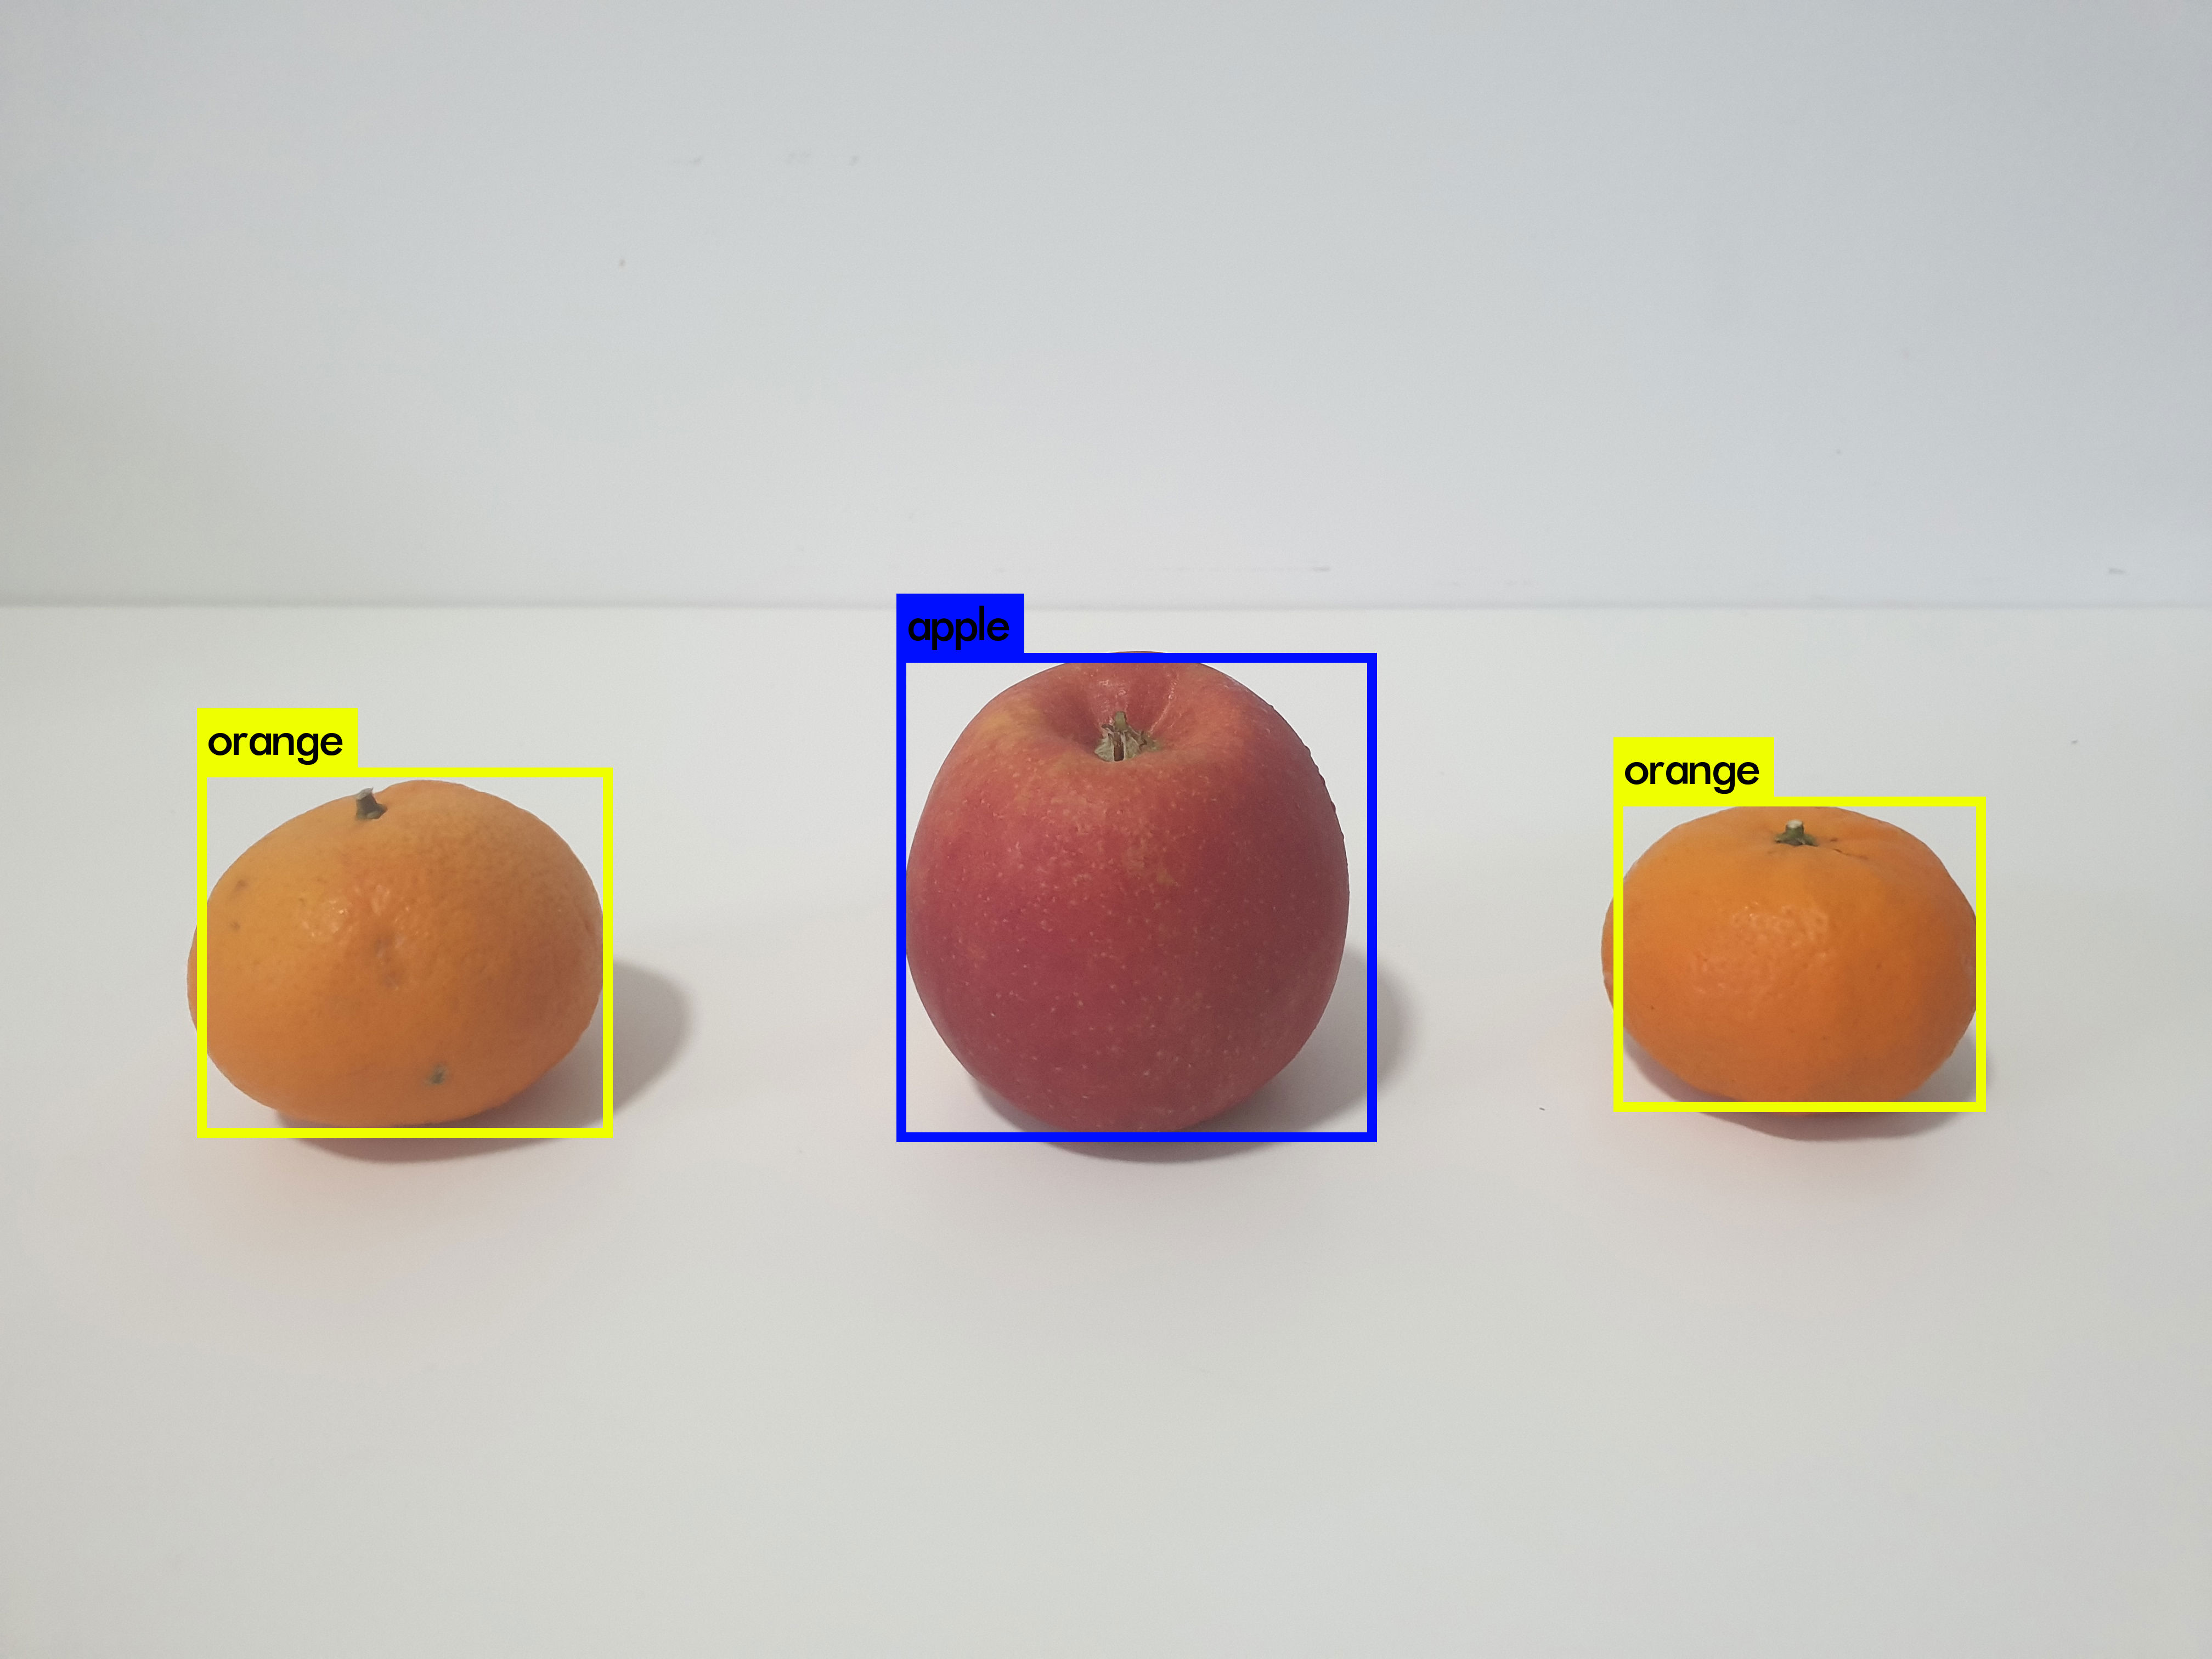

In [14]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('predictions.jpg')
cv2_imshow(img)

#2. Custom YOLO

In [15]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [20]:
!ls -al '/gdrive/MyDrive/darknet/custom'

total 28061
-rw------- 1 root root      15 Mar 18 15:41 classes.names
-rw------- 1 root root      15 Mar 18 04:41 classes.txt
-rw------- 1 root root     177 Mar 18 15:46 custom_data.data
-rw------- 1 root root    8328 Mar 18 15:03 custom-train-yolo.cfg
-rw------- 1 root root 2919914 Apr 18  2020 fruit01.jpg
-rw------- 1 root root      38 Mar 18 04:30 fruit01.txt
-rw------- 1 root root 2974631 Apr 18  2020 fruit02.jpg
-rw------- 1 root root      76 Mar 18 04:30 fruit02.txt
-rw------- 1 root root 2846652 Apr 18  2020 fruit03.jpg
-rw------- 1 root root      76 Apr 21  2020 fruit03.txt
-rw------- 1 root root 3223798 Apr 18  2020 fruit04.jpg
-rw------- 1 root root      38 Apr 21  2020 fruit04.txt
-rw------- 1 root root 2471492 Apr 18  2020 fruit05.jpg
-rw------- 1 root root      38 Apr 21  2020 fruit05.txt
-rw------- 1 root root 2945112 Apr 18  2020 fruit06.jpg
-rw------- 1 root root      76 Apr 21  2020 fruit06.txt
-rw------- 1 root root 2963363 Apr 18  2020 fruit07.jpg
-rw------- 1 root r

In [19]:
# Download Pretrained Convolutional Weights
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-03-19 04:25:01--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  3.38MB/s    in 49s     

2021-03-19 04:25:51 (3.19 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [31]:
!ls -al

total 408032
drwxr-xr-x 1 root root      4096 Mar 19 04:55 .
drwxr-xr-x 1 root root      4096 Mar 19 04:21 ..
drwxr-xr-x 2 root root      4096 Mar 19 04:55 backup
drwxr-xr-x 2 root root      4096 Mar 19 04:16 cfg
-rw-r--r-- 1 root root     61453 Mar 19 04:50 chart.png
-rw-r--r-- 1 root root       183 Mar 19 04:13 coco.data
-rw-r--r-- 1 root root       705 Mar 19 04:11 coco.names
drwxr-xr-x 4 root root      4096 Mar  5 14:36 .config
drwx------ 2 root root      4096 Mar 19 04:33 custom
-rwxr-xr-x 1 root root   3213624 Mar 19 04:14 darknet
-rw-r--r-- 1 root root 162482580 Mar 25  2018 darknet53.conv.74
drwxr-xr-x 4 root root      4096 Mar 19 04:16 data
-rw-r--r-- 1 root root   2670159 Mar 19 04:14 fruit10.jpg
-rw-r--r-- 1 root root    504496 Mar 19 04:16 labels.zip
-rw-r--r-- 1 root root    812994 Mar 19 04:18 predictions.jpg
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data
-rw-r--r-- 1 root root      8342 Mar 19 04:11 yolov3.cfg
-rw-r--r-- 1 root root 248007048 Mar 25  2018 yolo

In [25]:
!cp -r '/gdrive/MyDrive/darknet/custom' .

In [30]:
!mkdir backup

In [27]:
!ls -al /gdrive/MyDrive/darknet/custom

total 28061
-rw------- 1 root root      15 Mar 18 15:41 classes.names
-rw------- 1 root root      15 Mar 18 04:41 classes.txt
-rw------- 1 root root     177 Mar 18 15:46 custom_data.data
-rw------- 1 root root    8328 Mar 18 15:03 custom-train-yolo.cfg
-rw------- 1 root root 2919914 Apr 18  2020 fruit01.jpg
-rw------- 1 root root      38 Mar 18 04:30 fruit01.txt
-rw------- 1 root root 2974631 Apr 18  2020 fruit02.jpg
-rw------- 1 root root      76 Mar 18 04:30 fruit02.txt
-rw------- 1 root root 2846652 Apr 18  2020 fruit03.jpg
-rw------- 1 root root      76 Apr 21  2020 fruit03.txt
-rw------- 1 root root 3223798 Apr 18  2020 fruit04.jpg
-rw------- 1 root root      38 Apr 21  2020 fruit04.txt
-rw------- 1 root root 2471492 Apr 18  2020 fruit05.jpg
-rw------- 1 root root      38 Apr 21  2020 fruit05.txt
-rw------- 1 root root 2945112 Apr 18  2020 fruit06.jpg
-rw------- 1 root root      76 Apr 21  2020 fruit06.txt
-rw------- 1 root root 2963363 Apr 18  2020 fruit07.jpg
-rw------- 1 root r

In [ ]:
# Train The Model
!./darknet detector train custom/custom_data.data custom/custom-train-yolo.cfg darknet53.conv.74 -dont_show 

custom-train-yolo
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 1